In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import os 

## LOAD THE DATA

In [64]:
df = pd.read_excel('Canada.xlsx', sheet_name= 'Canada by Citizenship', skiprows=20, skipfooter=2)
df.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


## PREPRPCESSING OF DATA ACCORDING TO NEED 

In [65]:
print(df.columns.tolist())

['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName', 'DEV', 'DevName', 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013]


Column renaming according to need

In [66]:
df.rename({
    'OdName':'country',
    'AreaName':'continent',
    'RegName' : 'region',
    'DevName':'country_status'
}, axis =1 , inplace =True)

In [67]:
df.head()

,Type,Coverage,country,AREA,continent,REG,region,DEV,country_status,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


Dropping columns 

In [68]:
df.describe(include='object')

,Type,Coverage,country,continent,region,country_status
count,195,195,195,195,195,195
unique,1,2,195,6,22,2
top,Immigrants,Foreigners,Afghanistan,Africa,Western Asia,Developing regions
freq,195,194,1,54,18,147


In [69]:
df['Type'].value_counts() # counts the number of each unique value in the column

Immigrants    195
Name: Type, dtype: int64

In [70]:
cols_to_drop = ['Type', 'Coverage','AREA','REG','DEV']
df.drop(columns=cols_to_drop, inplace = True) # columns with no useful dat are dropped 

SETTING THE INDEX TO COUNTRY NAMES

In [71]:
df.set_index('country', inplace= True) # SETS COUNTRY AS INDEX

ADDING A TOTAL COLUMN WHICH IS THE SUM OF ALL THE YEARS FOR A PARTICULAR COUNTRY 

In [72]:
years = list(range(1980, 2014))
df['total']= df[years].sum(axis =1)
df.head(3)

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439


MAKING THE COUNTRY STATUS TO BINARY 

In [73]:
def binarize(val):
    if val == 'Developing regions':
        return 0
    else:
        return 1
df['country_status']= df['country_status'].apply(binarize)

In [74]:
df.sort_values(by='total', ascending = False, inplace= True)
df.head()

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,0,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,0,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,0,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,0,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600


rename few country names(that is index column)

In [75]:
df.rename({
    'United Kingdom of Great Britain and Northern Ireland' :'UK',
    'Venezuela (Bolivarian Republic of)':'Venezuela',
    'Iran (Islamic Republic of)':'Iran',
    'China, Hong Kong Special Administrative Region':'Hong Kong',
    "Democratic People's Republic of Korea":'Korea',
    'Democratic Republic of the Congo':'Congo',
    'China, Macao Special Administrative Region':'Macao',
    'Viet Nam':'Vietnam'
     
})

,continent,region,country_status,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,total
country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,0,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,0,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
UK,Europe,Northern Europe,1,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,0,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,0,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
San Marino,Europe,Southern Europe,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,5
New Caledonia,Oceania,Melanesia,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,2,5
Marshall Islands,Oceania,Micronesia,0,0,0,0,0,0,0,0,...,0,0,2,0,0,0,0,0,0,2


In [76]:
print(df.index.to_list())

['India', 'China', 'United Kingdom of Great Britain and Northern Ireland', 'Philippines', 'Pakistan', 'United States of America', 'Iran (Islamic Republic of)', 'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France', 'Jamaica', 'Viet Nam', 'Romania', 'Haiti', 'Guyana', 'Portugal', 'Egypt', 'Morocco', 'Colombia', 'Iraq', 'Algeria', 'Israel', 'Bangladesh', 'Germany', 'Russian Federation', 'Mexico', 'Afghanistan', 'El Salvador', 'Ukraine', 'Trinidad and Tobago', 'Somalia', 'South Africa', 'Nigeria', 'Jordan', 'Ethiopia', 'Peru', 'Turkey', 'Syrian Arab Republic', 'Brazil', 'Japan', 'Netherlands', 'Ghana', 'Democratic Republic of the Congo', 'Malaysia', 'Australia', 'Bulgaria', 'Italy', 'Bosnia and Herzegovina', 'Chile', 'Venezuela (Bolivarian Republic of)', 'Fiji', 'Cuba', 'Argentina', 'Guatemala', 'Sudan', 'Tunisia', 'Kenya', 'Ireland', 'Hungary', 'Cameroon', 'Albania', 'Mauritius', 'Switzerland', 'Republic of Moldova', 'Singapore', 'Indonesia', 'United Republic of Tanzania', 'Gre

## CHANGE THE PLOTTING THEME 

In [77]:
print(plt.style.available)
plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


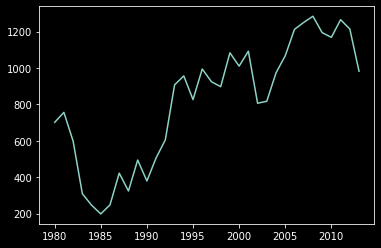

In [78]:
df.loc['Japan',years].plot(kind='line')
plt.show()

## ADD PANDAS STYLING

In [79]:
continent_df=df.groupby('continent')[years].sum()

In [80]:
continent_df.style.background_gradient(cmap='rainbow')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [81]:
continent_df.style.bar(color='darkblue')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


In [82]:
continent_df.style.text_gradient(cmap='rainbow')

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
continent,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,11012,14228,19242,16531,13072,14806,15700,14471,13791,15996,20346,24292,22710,23366,28192,27523,29188,28284,29890,34534,40892,35441,38083,38543
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,72829,89964,90752,98737,88852,90424,103030,106383,90929,106844,134544,148083,137653,131769,134850,159253,149054,133459,139894,141434,163845,146894,152218,155075
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,68301,57938,64123,62937,62531,55764,55642,48841,36719,35639,38215,42779,36798,34556,38082,35955,33053,33495,34692,35078,33425,26778,29177,28691
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,27942,36827,37853,33840,21341,20262,18645,17174,13830,15088,16898,20067,19317,20263,22181,24747,24676,26011,26547,26867,28818,27856,27173,24950
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,5895,6057,6846,7438,5902,4891,5516,4753,4437,5196,5433,5604,4948,5543,6990,8394,9613,9463,10190,8995,8142,7677,7892,8503
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,2075,2495,2871,2566,1967,1565,1552,1263,1021,1055,1276,1818,1685,1800,1788,1585,1473,1693,1834,1860,1834,1548,1679,1775


## Visualization


In [83]:
import plotly.express as px
import seaborn as sns 
import matplotlib.pyplot as plt 


#### basic graphs- Matplotlib
1. line plot 
2. bar plot 
3. pie chart 
4. box plot 
5. scatter plot 
6. histogram 
7. area plot 
#### advanced graphs - seaborn 
1. catplot 
2. jointplot 
3. pairplot 
4. heatmap
5. violinplot
6. countplot
#### interactive graphs - Plotly 
1. graphs similar to matplotlib but interactive 

In [84]:
df.plot?

Signature:      df.plot(*args, **kwargs)
Type:           PlotAccessor
String form:    <pandas.plotting._core.PlotAccessor object at 0x000001217CA03580>
File:           c:\users\dell\miniconda3\lib\site-packages\pandas\plotting\_core.py
Docstring:     
Make plots of Series or DataFrame.

Uses the backend specified by the
option ``plotting.backend``. By default, matplotlib is used.

Parameters
----------
data : Series or DataFrame
    The object for which the method is called.
x : label or position, default None
    Only used if data is a DataFrame.
y : label, position or list of label, positions, default None
    Allows plotting of one column versus another. Only used if data is a
    DataFrame.
kind : str
    The kind of plot to produce:

    - 'line' : line plot (default)
    - 'bar' : vertical bar plot
    - 'barh' : horizontal bar plot
    - 'hist' : histogram
    - 'box' : boxplot
    - 'kde' : Kernel Density Estimation plot
    - 'density' : same as 'kde'
    - 'area' : area plot


<AxesSubplot: >

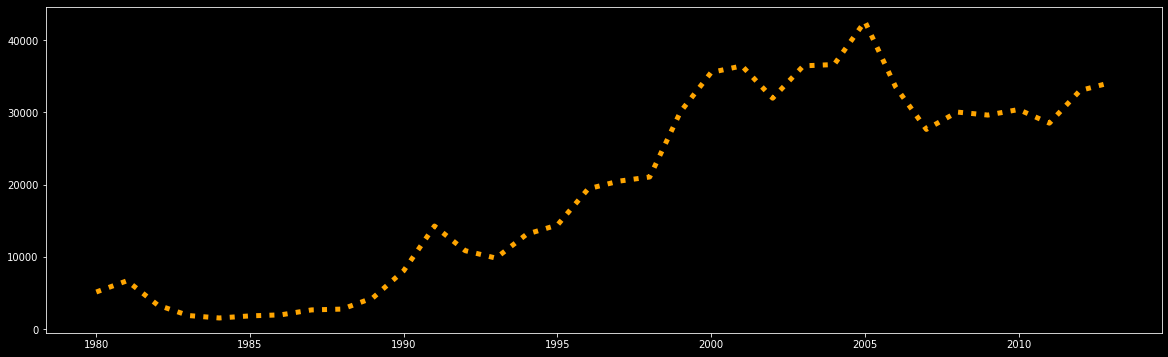

In [85]:
df.loc['China',years].plot(kind='line', figsize=(20,6), linewidth=5 , linestyle=':', color='orange')

<AxesSubplot: >

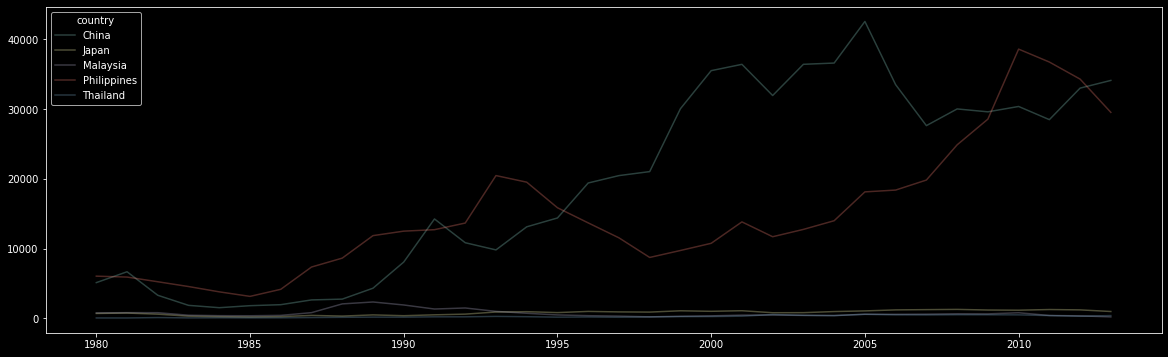

In [86]:
country_list= ['China','Japan','Malaysia','Philippines','Thailand']
df.loc[country_list,years].T.plot(figsize=(20,6), stacked= False, alpha =.3)

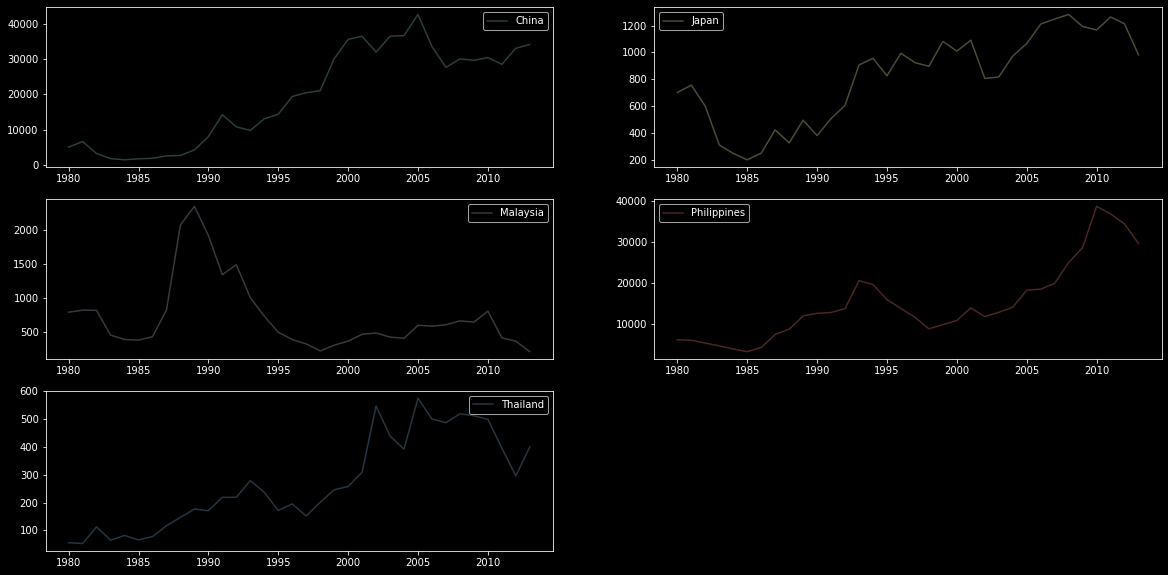

In [87]:
_= df.loc[country_list,years].T.plot(figsize=(20,10), subplots=True,layout=(3,2), sharex= False, alpha =.3)

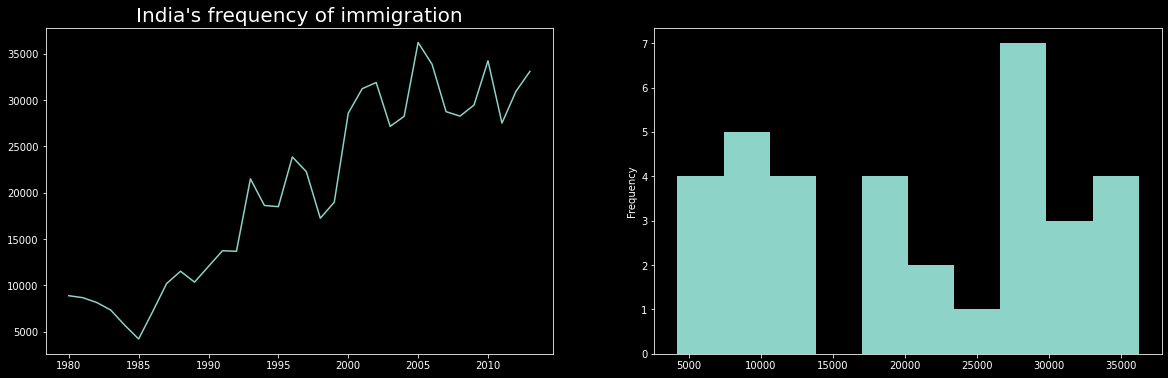

In [88]:
fig,ax = plt.subplots(figsize=(20,6), nrows=1, ncols=2, )
df.loc['India',years].plot(ax=ax[0])
df.loc['India',years].plot(ax=ax[1], kind='hist')
ax[0].set_title("India's Immigration to Canada", fontsize=20)
ax[0].set_title("India's frequency of immigration", fontsize=20)
plt.show()

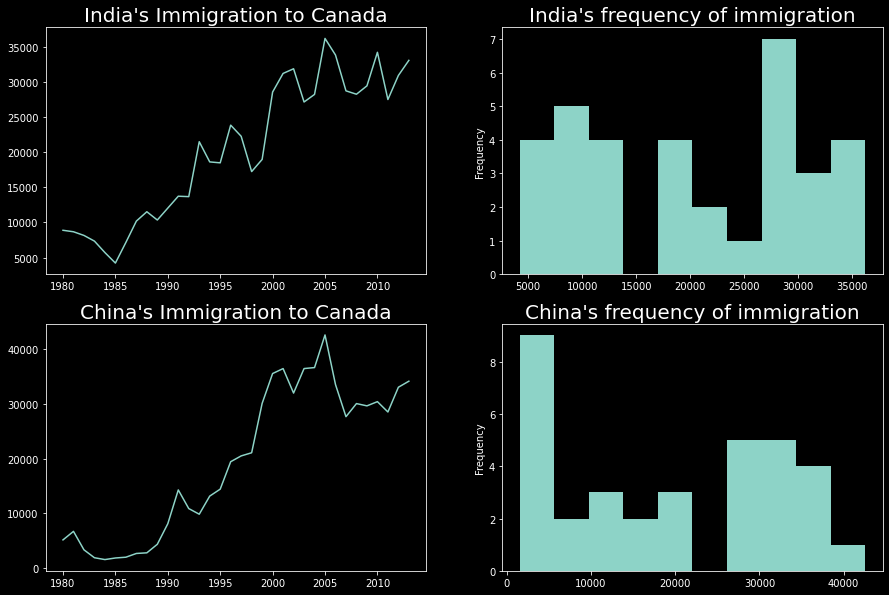

In [89]:
fig,ax = plt.subplots(figsize=(15,10), nrows=2, ncols=2, )
df.loc['India',years].plot(ax=ax[0,0])
df.loc['India',years].plot(ax=ax[0,1], kind='hist')
df.loc['China',years].plot(ax=ax[1,0])
df.loc['China',years].plot(ax=ax[1,1], kind='hist')
ax[0,0].set_title("India's Immigration to Canada", fontsize=20)
ax[0,1].set_title("India's frequency of immigration", fontsize=20)
ax[1,0].set_title("China's Immigration to Canada", fontsize=20)
ax[1,1].set_title("China's frequency of immigration", fontsize=20)
plt.show()

<AxesSubplot: >

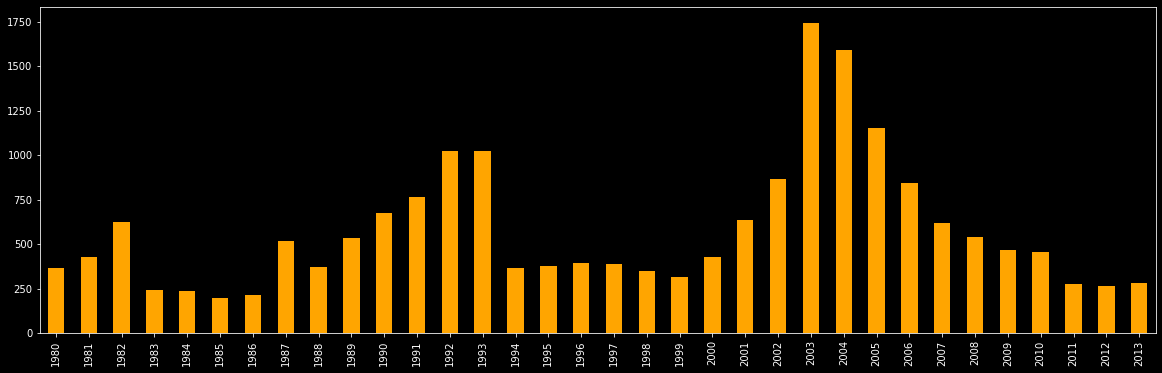

In [90]:
df.loc['Argentina',years].plot(kind= 'bar',figsize=(20,6), color='orange')

<AxesSubplot: >

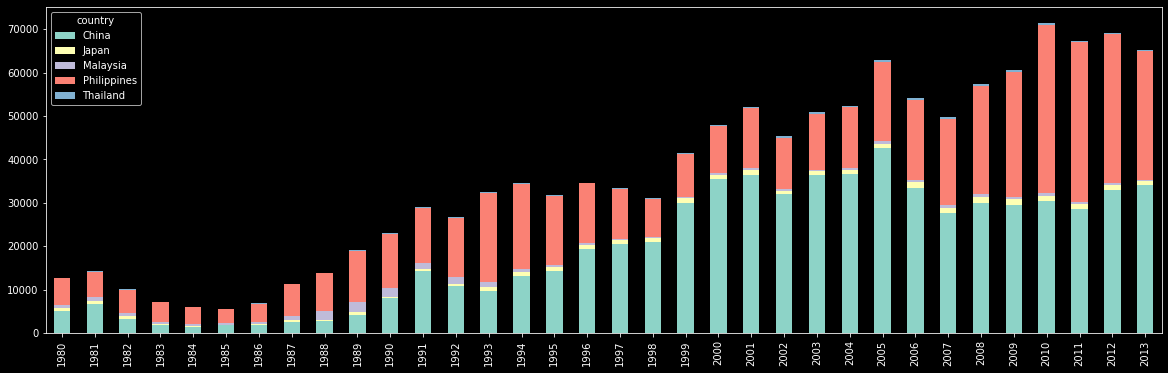

In [91]:
df.loc[country_list,years].T.plot(kind='bar',figsize=(20,6), stacked= True)

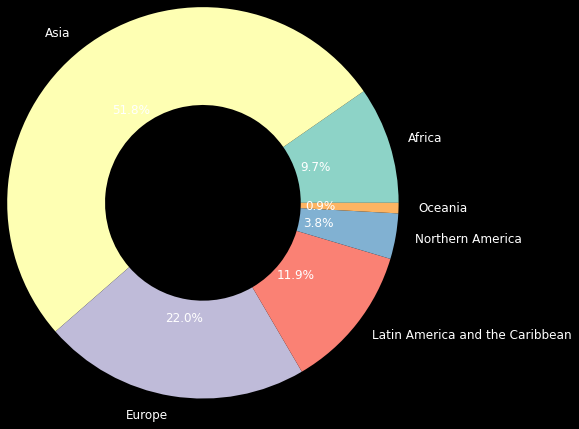

In [92]:
plt.figure(facecolor='black')
continent_df['total']= continent_df.sum(axis=1)
continent_df['total'].plot(kind='pie', figsize=(20,6),autopct='%1.1f%%',
radius=1.5, fontsize=12, wedgeprops={'width':0.75})
plt.ylabel('') 
plt.savefig('continent_wise_immigration_pie_chart.png',dpi=300,bbox_inches= 'tight' )



<AxesSubplot: >

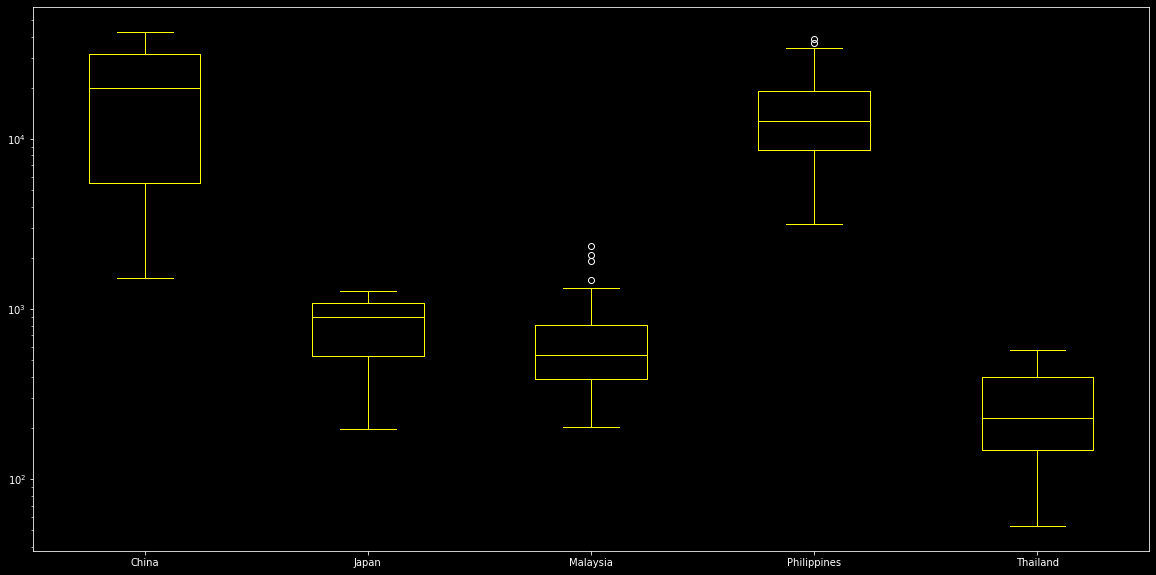

In [93]:
df.loc[country_list,years].T.plot(kind='box',figsize=(20,10),logy=True,color='yellow')

#### Plotly
- if you are getting a graph and a long error before it 
..
pip install ndformat 
..
- then restart notebook and run all

In [62]:
years= list(range(1980,2014))
india_data = df.loc['India',years]
px.line(india_data, x=india_data.index, y= india_data.values, markers=True)

In [94]:
px.bar(india_data, x=india_data.index, y= india_data.values)

In [97]:
countrydf= df.loc[country_list, years]
px.bar(countrydf, x=countrydf.index, y= countrydf.columns, log_y=True)

In [98]:
px.line(countrydf, x=countrydf.index, y= countrydf.columns)

In [99]:
px.area(countrydf, x=countrydf.index, y= countrydf.columns)

In [101]:
px.funnel(countrydf, x=countrydf.index, y= countrydf.columns)

In [102]:
px.choropleth(df,locations=df.index,locationmode='country names', color='total', height=600)

In [104]:
px.choropleth(df,locations=df.index,locationmode='country names', color='total', animation_group=df.index)

install these libraries 
...
pip install opencv-contrib-python mediapipe pillow streamlit sqlalchemy
pip install folium 
...

In [105]:
import folium

In [106]:
folium.Map(location=[26.850000,80.949997], zoom_start=14, height=400)

In [108]:
folium.Map(location=[26.850000,80.949997], zoom_start=14, height=400, tiles= 'Stamen Terrain')

In [109]:
lko=folium.Map(location=[26.850000,80.949997], zoom_start=14, height=400)
m1=folium.Marker([26.850000,80.949997], popup='Lucknow Center', tooltip='click to see')
m1.add_to(lko)
lko

In [113]:
lko.add_child(folium.ClickForMarker())
lko